# Clustering
## crime_data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy .spatial.distance import cdist
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\Clustering\crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### EDA

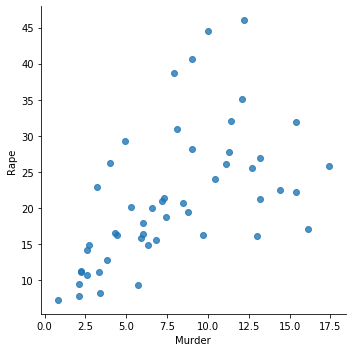

In [4]:

sns.lmplot('Murder','Rape',data=df,fit_reg=False)

In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(df.iloc[:,1:])

In [7]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


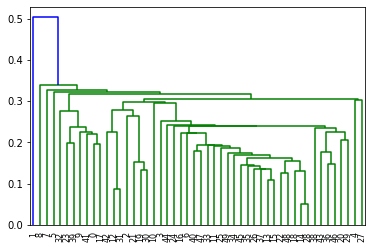

In [8]:
# Dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [9]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [10]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [11]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [12]:
df_norm['h_clusterid'] = hc.labels_
df_norm.iloc[:,:4].groupby(df_norm.h_clusterid).mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,0.800452,0.711473,0.364407,0.445413
1,0.296084,0.298973,0.657627,0.279070
2,0.143373,0.115411,0.293220,0.111886
3,0.607430,0.725742,0.785311,0.644703


In [13]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(df_norm['h_clusterid'],hc.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



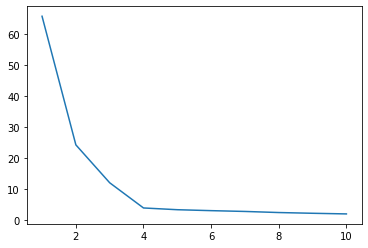

In [14]:
EC = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,random_state=0)
    kmean.fit(df_norm)
    EC.append(kmean.inertia_)
plt.plot(range(1,11),EC)
plt.show()

In [15]:
model = KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([3, 3, 2, 1, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 1, 3, 0, 2, 1, 2,
       1, 3, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 1, 1])

In [16]:
x = pd.Series(model.labels_)
df['Cluster'] = x
df.iloc[:,1:5].groupby(df.Cluster).mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,3.180000,78.700000,49.300000,11.6300
1,5.715000,132.300000,70.800000,18.1000
2,10.883333,256.916667,78.333333,32.2500
3,14.087500,252.750000,53.500000,24.5375
